# Recurrent neural networks for sequence modelling

* Workshop on Neural Networks and Deep Learning, December 2020

## Sequence modelling

* Datasets where data points are entire sequences
* Sequences possibly of different lengths
* Examples, sequences can be of:
    - Natural language words
    - DNA or RNA nucleotides
    - Protein amino acids
    - Continuous sensor data over discretized time
* This lecture: modelling using recurrent neural networks

## Examples 

- Classification, here phylum of 16S ribosomal RNA reads: 
```python
g('TAGATAGTTGGTGGGGTAATGGCCTACCAAGTCTACGA') = Proteobacteria
g('TGCCGTGAGGTGGAGCGAATCCCTAAAAGCCGGTCTCA') = Actinobacteria
```

- Natural language next word prediction (language model): 
```python
f("It's important what the quality of the assemblies of these reads") = "is"
```

- Protein carbon atom position prediction (protein tertiary structure):
```python
h('AYTNSFTRG'...) =  [ (195.359, 179.799, 144.920),
                         (192.419, 175.841, 147.667),
                         (189.946, 180.058, 150.059), ... ]
```

## Examples 

- Classification: many-to-one (one output per sequence)
```python
g('TAGATAGTTGGTGGGGTAATGGCCTACCAAGTCTACGA') = Proteobacteria
g('TGCCGTGAGGTGGAGCGAATCCCTAAAAGCCGGTCTCA') = Actinobacteria
```

- Language model: many-to-many (only one output shown here) 
```python
f("It's important what the quality of the assemblies of these reads") = "is"
```

- "Regression": many-to-many (continuous outputs)
```python
h('AYTNSFTRG'...) =  [ (195.359, 179.799, 144.920),
                         (192.419, 175.841, 147.667),
                         (189.946, 180.058, 150.059), ... ]
```

## Simple sequence modelling techniques

Fixed windows (with one-hot encoding)

Bag of words

Todo: Add figure

## Modelling sequences with recurrent neural networks

Let the inputs be $x_0, \cdots, x_t$ and encode them to $h_0, \cdots, h_t$. Run them through the _same_ neural network $A$ with $x_t$ and $h_{t-1}$ as inputs.

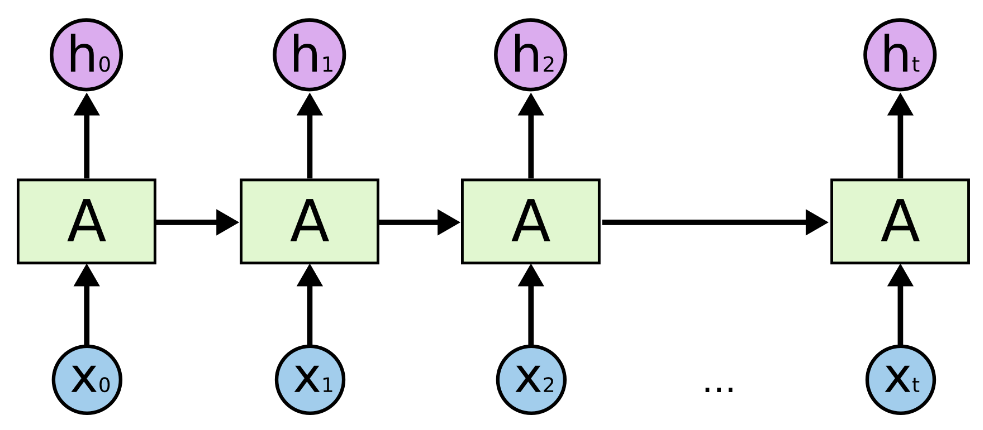

_Image credit: Christopher Olah_

Simplest such A to try: FFNN. Elman Recurrent Neural Network (1990), in keras `SimpleRNN`:

\begin{align}
h_t &= \tanh(W x_t + U h_{t-1} + b)
\end{align}

* $x_t \in \mathbb{R}^{d}$: input vector
* $h_t \in \mathbb{R}^{h}$: hidden state, also the output vector
* $W \in \mathbb{R}^{h \times d}$, $U \in \mathbb{R}^{h \times h} $ and $b \in \mathbb{R}^{h}$: weight matrices and biases

_Weight sharing_: same weights - same A - are used at every time step.

## Vanishing gradients

Elman RNN suffers from vanishing gradients because we multiply many small numbers in $(-1, 1)$. 

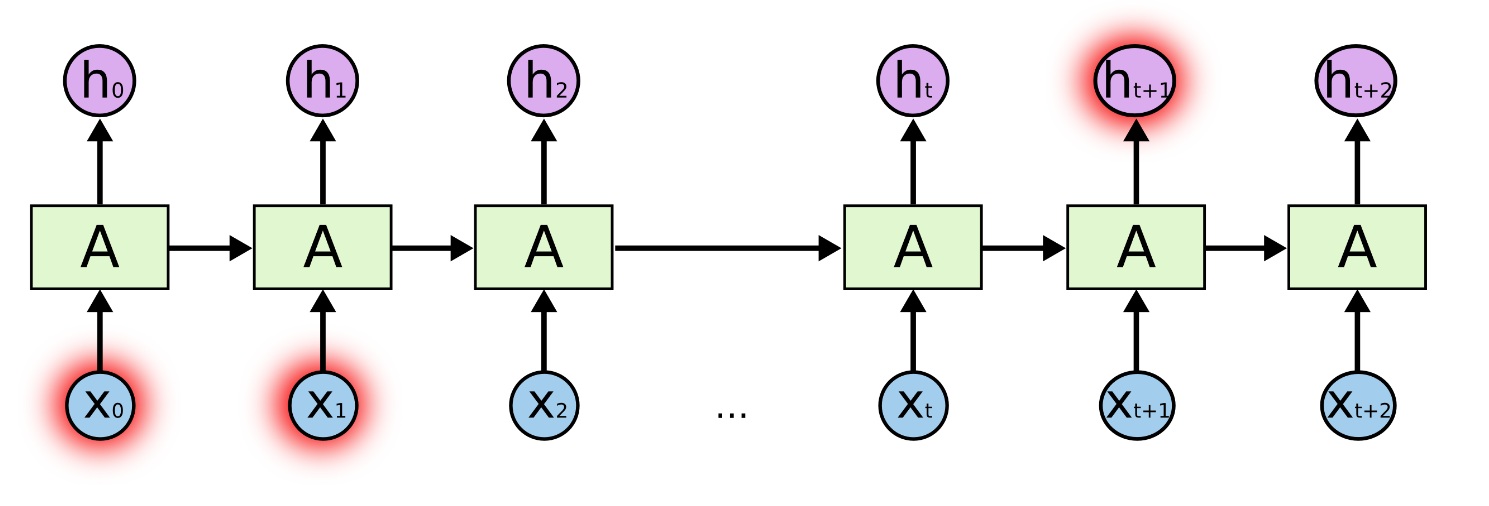

Todo: include derivative

## Long Short-Term Memory (LSTM)

Hochreiter & Schmidhuber (1997):

\begin{align}
f_t &= \sigma(W_{f} x_t + U_{f} h_{t-1} + b_f) \\
i_t &= \sigma(W_{i} x_t + U_{i} h_{t-1} + b_i) \\
o_t &= \sigma(W_{o} x_t + U_{o} h_{t-1} + b_o) \\
c_t &= f_t \circ c_{t-1} + i_t \circ \tanh(W_{c} x_t + U_{c} h_{t-1} + b_c) \\
h_t &= o_t \circ c_t \\
\end{align}

* $x_t \in \mathbb{R}^{d}$: input vector to the LSTM unit
* $f_t \in \mathbb{R}^{h}$: forget gate's activation vector
* $i_t \in \mathbb{R}^{h}$: input/update gate's activation vector
* $o_t \in \mathbb{R}^{h}$: output gate's activation vector
* $h_t \in \mathbb{R}^{h}$: hidden state vector: output vector of the LSTM unit
* $c_t \in \mathbb{R}^{h}$: cell state vector
* $W \in \mathbb{R}^{h \times d}$, $U \in \mathbb{R}^{h \times h} $ and $b \in \mathbb{R}^{h}$: weight matrices and biases
* $\circ$ elementwise multiplication $\mathbb{R}^h \times \mathbb{R}^h \to \mathbb{R}^h$

## Long Short-Term Memory (LSTM)

Let's write $\sigma_f(x, h)$ for $\sigma(W_f x + U_f h + b_f)$ with learnable $W_f \in \mathbb{R}^{h \times d}$, $U_f \in \mathbb{R}^{h \times h} $ and $b_f \in \mathbb{R}^{h}$ and so on for $\sigma_i$, $\sigma_o$ and $\tanh_c$ with their own learnable parameters:

\begin{align}
f_t &= \sigma_f(x_t, h_{t-1}) \\
i_t &= \sigma_i(x_t, h_{t-1}) \\
o_t &= \sigma_o(x_t, h_{t-1}) \\
c_t &= f_t \circ c_{t-1} + i_t \circ \tanh_c(x_t, h_{t-1}) \\
h_t &= o_t \circ c_t
\end{align}

* $x_t \in \mathbb{R}^{d}$: input vector to the LSTM unit
* $f_t \in \mathbb{R}^{h}$: forget gate's activation vector
* $i_t \in \mathbb{R}^{h}$: input/update gate's activation vector
* $o_t \in \mathbb{R}^{h}$: output gate's activation vector
* $h_t \in \mathbb{R}^{h}$: hidden state vector: output vector of the LSTM unit
* $c_t \in \mathbb{R}^{h}$: cell state vector
* $\circ$ elementwise multiplication $\mathbb{R}^h \times \mathbb{R}^h \to \mathbb{R}^h$

## Long Short-Term Memory (LSTM)

Let's write $\sigma_f(x, h)$ for $\sigma(W_f x + U_f h + b_f)$ with learnable $W_f \in \mathbb{R}^{h \times d}$, $U_f \in \mathbb{R}^{h \times h} $ and $b_f \in \mathbb{R}^{h}$ and so on for $\sigma_i$, $\sigma_o$ and $\tanh_c$ with their own learnable parameters:

\begin{align}
c_t &= \sigma_f(x_t, h_{t-1}) \circ c_{t-1} + \sigma_i(x_t, h_{t-1}) \circ \tanh_c(x_t, h_{t-1}) \\
h_t &= \sigma_o(x_t, h_{t-1}) \circ c_t
\end{align}

* $x_t \in \mathbb{R}^{d}$: input vector to the LSTM unit
* $h_t \in \mathbb{R}^{h}$: hidden state vector: output vector of the LSTM unit
* $c_t \in \mathbb{R}^{h}$: cell state vector
* $f$: forget, $i$: input, $o$: output
* $\circ$ elementwise multiplication $\mathbb{R}^h \times \mathbb{R}^h \to \mathbb{R}^h$

## Running synthetic example: particle on a 2D random walk

* Example to illustrate:
    * many-to-many
    * many-to-one
    * categorical inputs and outputs
    * continuous inputs and outputs
    * how to examine a trained network
    
```
#####            #####
## ##            ## ##        x: particle
#   #            # x #        #: obstruction
# x #  ->  U ->  #   #
#   #            #   #
#####            #####
```

We observe a sequence of directions of movements, such as `ULDDRURDLUUU`. Key: **D**own, **U**p, **L**eft, **R**ight.

### First model: sequences to coordinates

Some example inputs and outputs we want a model `f` to capture:

```python
f("U") = [(2, 2)]
f("UL") = [(2, 2), (1, 2)]
f("ULD") = [(2, 2), (1, 2), (1, 3)]
```

In [571]:
import tensorflow as tf
import tensorflow.keras as K
import tensorflow.keras.layers as L
import numpy as np
import pandas as pd
from pprint import pprint as pp
import seaborn as sns
from matplotlib import pyplot as plt
rng = np.random.default_rng()
sns.set_style('whitegrid')
sns.set_palette("tab10")   

In [691]:
def step(x, y, d, step_size=1):
    if d == 'D': y += step_size   
    if d == 'U': y -= step_size
    if d == 'L': x -= step_size 
    if d == 'R': x += step_size
    return x, y

world = '''
#####
## ##
#   #
# x #
#   #
#####
'''.strip().split('\n')

start_y = [ y for y, row in enumerate(world) if 'x' in row ][0]
start_x = world[start_y].find('x')

def inside(x, y):
    return 0 <= y < len(world) and 0 <= x < len(world[int(y)]) and world[int(y)][int(x)] != '#'

In [692]:
def alts_at(x, y):
    alts = ''
    for d in 'DULR':
        if inside(*step(x, y, d)):
            alts += d
    return alts

def randstep(x, y, step_size=1):
    alts = alts_at(x, y)
    d = rng.choice(list(alts)) if alts else ''
    x, y = step(x, y, d, step_size)
    return dict(x=x, y=y, d=d)

In [693]:
[
    ','.join([
        (alts_at(x, y) if inside(x, y) else '').rjust(4)
        for x in range(5)
    ])    
    for y in range(6)   
]

['    ,    ,    ,    ,    ',
 '    ,    ,   D,    ,    ',
 '    ,  DR,DULR,  DL,    ',
 '    , DUR,DULR, DUL,    ',
 '    ,  UR, ULR,  UL,    ',
 '    ,    ,    ,    ,    ']

In [575]:
def simulate(Timesteps):
    x, y = start_x, start_y
    rows = []
    for t in range(Timesteps):
        row = randstep(x, y)
        x, y = row['x'], row['y']
        row['t'] = t
        rows += [row]
    return pd.DataFrame(rows) 

simulate(5)

,x,y,d,t
0,2,2,U,0
1,2,1,U,1
2,2,2,D,2
3,2,3,D,3
4,2,4,D,4


In [576]:
dfs = []
N = 1000
T = 30
for i in range(N):
    df = simulate(T)
    df['sim'] = i
    dfs += [df]
df = pd.concat(dfs, axis='index').reset_index(drop=True)
df.head()

,x,y,d,t,sim
0,3,3,R,0,0
1,2,3,L,1,0
2,2,2,U,2,0
3,2,3,D,3,0
4,1,3,L,4,0


In [577]:
df.pivot('sim', 't')

x                             ...  d                           
t   0  1  2  3  4  5  6  7  8  9   ... 20 21 22 23 24 25 26 27 28 29
sim                                ...                              
0    3  2  2  2  1  2  2  2  2  3  ...  L  L  R  L  R  U  D  D  L  D
1    2  1  2  2  2  3  2  2  3  3  ...  U  D  U  L  U  U  D  R  D  L
2    2  3  3  3  2  1  2  2  1  1  ...  D  D  U  U  D  U  L  D  U  U
3    2  3  3  3  2  3  2  3  2  1  ...  R  R  D  D  U  L  R  L  L  D
4    1  1  2  1  2  1  2  2  2  2  ...  R  U  D  U  D  R  D  U  D  L
..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
995  2  2  3  3  3  2  3  3  3  3  ...  U  L  R  D  L  U  D  U  R  U
996  1  1  1  1  2  1  1  2  3  3  ...  D  D  R  L  R  D  L  U  U  L
997  2  1  1  1  2  3  2  2  1  1  ...  D  U  D  D  L  R  L  D  U  R
998  1  2  3  2  3  2  2  3  3  3  ...  L  U  D  U  D  R  D  L  U  L
999  2  3  2  1  1  1  1  1  1  1  ...  L  R  L  U  L  D  R  R  U  D

[1000 rows x 90 columns]

The neural network only accept numeric inputs. Translate DULR chars to int keys:

In [578]:
tr = dict(zip('DULR', range(4)))
tr

{'D': 0, 'U': 1, 'L': 2, 'R': 3}

In [579]:
df['d_tr'] = df.d.map(tr)
df.pivot('sim', 't').d_tr

t,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
sim,,,,,,,,,,,,,,,,,,,,,
0,3,2,1,0,2,3,1,0,0,3,...,2,2,3,2,3,1,0,0,2,0
1,0,2,3,1,1,3,2,0,3,1,...,1,0,1,2,1,1,0,3,0,2
2,1,3,0,1,2,2,3,0,2,0,...,0,0,1,1,0,1,2,0,1,1
3,0,3,1,0,2,3,2,3,2,2,...,3,3,0,0,1,2,3,2,2,0
4,2,1,3,2,3,2,3,0,0,1,...,3,1,0,1,0,3,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,3,1,0,2,3,0,1,1,...,1,2,3,0,2,1,0,1,3,1
996,2,0,1,0,3,2,1,3,3,1,...,0,0,3,2,3,0,2,1,1,2
997,1,2,0,0,3,3,2,1,2,1,...,0,1,0,0,2,3,2,0,1,3


In [580]:
df.describe()

,x,y,t,sim,d_tr
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2.001333,2.906067,14.500000,499.500000,1.429633
std,0.736308,0.845656,8.655586,288.679802,1.113863
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,7.000000,249.750000,0.000000
50%,2.000000,3.000000,14.500000,499.500000,1.000000
75%,3.000000,4.000000,22.000000,749.250000,2.000000
max,3.000000,4.000000,29.000000,999.000000,3.000000


### Data to numpy matrices

Apply _zmuv_, zero mean and unit variance, to positions to avoid having the network spend time on learning biases.

In [581]:
def zmuv(d, axis=None):
    '''Zero mean, unit variance'''
    return (d - d.mean(axis=axis)) / d.std(axis=axis)

pdf = df.pivot('sim', 't')
D = pdf.d_tr.to_numpy()
X = zmuv(pdf.x.to_numpy())
Y = zmuv(pdf.y.to_numpy())
print('D', D.shape, np.unique(D))
print('X', X.shape, np.unique(np.round(X, 2)))
print('Y', Y.shape, np.unique(np.round(Y, 2)))

D (1000, 30) [0 1 2 3]
X (1000, 30) [-1.36 -0.    1.36]
Y (1000, 30) [-2.25 -1.07  0.11  1.29]


### Embedding layer: int to vector

We don't want to pass the translated directions 0, 1, 2, 3 directly to not use their linear order as an inductive bias. Instead associate each int with a vector using an embedding layer.
 
An embedding layer takes an int $< n$ and returns a vector of dim $d$. Weights: $n \cdot d$. Typically uniform initialization or load pre-trained vectors. Special case: one-hot encoding when initializer is the identity matrix:

In [582]:
emb = L.Embedding(input_dim=4, output_dim=4, embeddings_initializer='identity', trainable=False)
emb(np.array([[0, 1, 2, 3, 2, 0]]))

<tf.Tensor: shape=(1, 6, 4), dtype=float32, numpy=
array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]]], dtype=float32)>

### First model with keras: sequence in, positions out

In [583]:
x = inp = K.Input((None, ))                          
x = L.Embedding(4, 4, 'identity', trainable=False)(x)
x = enc = L.LSTM(16, return_sequences=True)(x)  # many-to-many: return_sequences of encoded states
px = L.Dense(1, name='x')(x)
py = L.Dense(1, name='y')(x)
M = K.Model(inputs=[inp], outputs=[px, py])
M.summary()
M.compile('adam', ['mse', 'mse'])

Model: "model_69"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_56 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_68 (Embedding)        (None, None, 4)      16          input_56[0][0]                   
__________________________________________________________________________________________________
lstm_50 (LSTM)                  (None, None, 16)     1344        embedding_68[0][0]               
__________________________________________________________________________________________________
x (Dense)                       (None, None, 1)      17          lstm_50[0][0]                    
___________________________________________________________________________________________

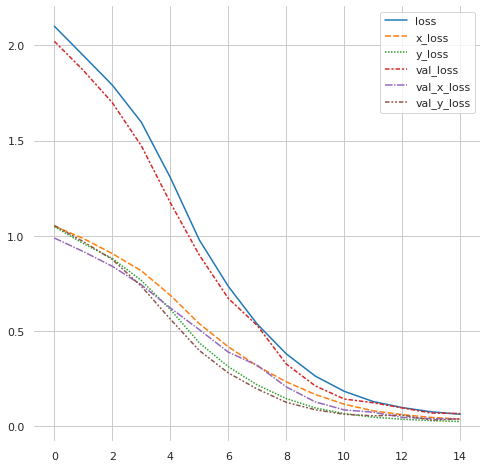

In [584]:
hist = M.fit(D[:900, :20], (X[:900, :20], Y[:900, :20]), 
             validation_data=(D[900:], (X[900:], Y[900:])), 
             epochs=15, verbose=0)
sns.set(style='whitegrid', rc={'figure.figsize': (8, 8)})
sns.lineplot(data=hist.history, palette='tab10')
sns.despine(left=True, bottom=True)

### Model examination, looking at the encoded state

In [585]:
from sklearn.decomposition import PCA

In [586]:
Encoder = K.Model(inputs=[inp], outputs=[enc])

In [587]:
def activations(Encoder, sim=0): 
    pdf = df.pivot('sim', 't')
    d_tr = pdf.d_tr.to_numpy()[sim:][:1]
    d    = pdf.d.to_numpy()[sim:][:1]
    data = Encoder(d_tr).numpy().squeeze().T
    sns.set(rc={'figure.figsize': (13, 4)})
    sns.heatmap(data=data, square=True, xticklabels=d.squeeze(), cmap='icefire')    

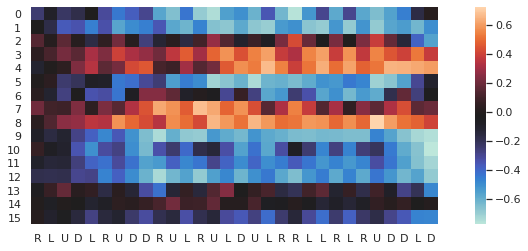

In [588]:
activations(Encoder)

In [589]:
df['pos'] = (df.x).map(str) + ',' + (df.y).map(str)
df.pos = df.pos.where(df.pos != '2,1', '2,1*')
df.head()

,x,y,d,t,sim,d_tr,pos
0,3,3,R,0,0,3,"3,3"
1,2,3,L,1,0,2,"2,3"
2,2,2,U,2,0,1,"2,2"
3,2,3,D,3,0,0,"2,3"
4,1,3,L,4,0,2,"1,3"


In [752]:
def pca_plots(Encoder):
    encoded = Encoder(D).numpy()
    encoded = encoded.reshape(-1, encoded.shape[-1])
    pca = PCA(2).fit_transform(encoded)
    sns.set(style='whitegrid', rc={'figure.figsize': (8, 8)})
    sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=df.pos.values, palette='tab10')

In [753]:
pca_plots(Encoder)

AssertionError: Could not compute output Tensor("lstm_65/Identity:0", shape=(None, None, 128), dtype=float32)

## Second model: predict next direction (language model)

In [592]:
Next_D = D[:, 1:]
Init_D = D[:, :-1]
print(Init_D[0])
print('>', Next_D[0])
print(Next_D.shape, Init_D.shape)

[3 2 1 0 2 3 1 0 0 3 1 2 3 1 2 0 1 2 3 3 2 2 3 2 3 1 0 0 2]
> [2 1 0 2 3 1 0 0 3 1 2 3 1 2 0 1 2 3 3 2 2 3 2 3 1 0 0 2 0]
(1000, 29) (1000, 29)


In [593]:
x = inp = K.Input((None, ))
x = L.Embedding(4, 4, 'identity', trainable=False)(x)
x = enc = L.LSTM(16, return_sequences=True)(x)
x = L.Dense(4, 'softmax', name='next_d')(x)
M = K.Model(inputs=[inp], outputs=[x])
M.summary()
M.compile('adam', ['sparse_categorical_crossentropy'], ['acc'])

Model: "model_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_57 (InputLayer)        [(None, None)]            0         
_________________________________________________________________
embedding_69 (Embedding)     (None, None, 4)           16        
_________________________________________________________________
lstm_51 (LSTM)               (None, None, 16)          1344      
_________________________________________________________________
next_d (Dense)               (None, None, 4)           68        
Total params: 1,428
Trainable params: 1,412
Non-trainable params: 16
_________________________________________________________________


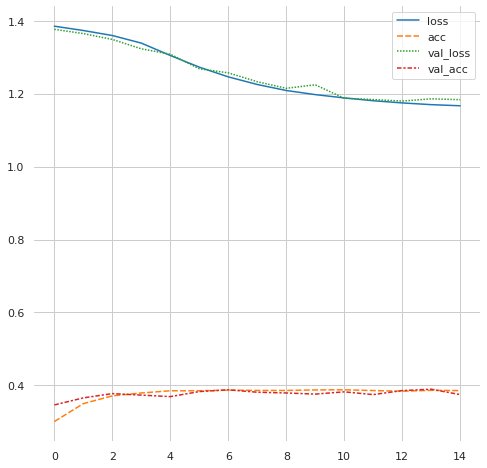

In [594]:
hist = M.fit(Init_D[:900, :20], Next_D[:900, :20], 
             validation_data=(Init_D[900:], Next_D[900:]), 
             epochs=15, verbose=0)
sns.set(style='whitegrid', rc={'figure.figsize': (8, 8)})
sns.lineplot(data=hist.history, palette='tab10')
sns.despine(left=True, bottom=True)

In [595]:
Encoder = K.Model(inputs=[inp], outputs=[enc])

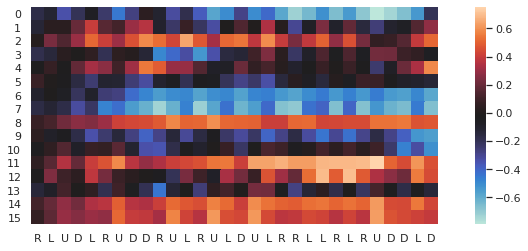

In [596]:
activations(Encoder)

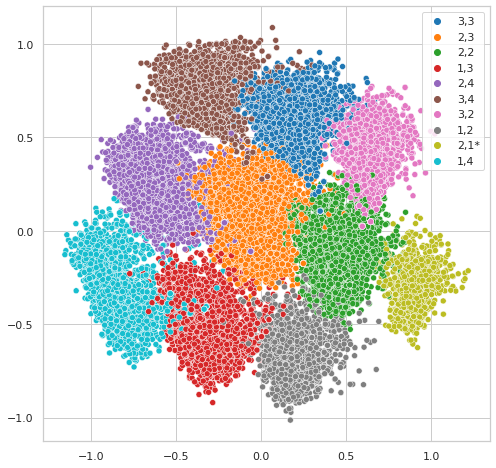

In [597]:
pca_plots(Encoder)

## Third model: classify if sequence ever visits 2,1*

In [598]:
len(df[df.pos == '2,1*'].sim.unique()), len(df.sim.unique())

(594, 1000)

In [599]:
Star_Train = (df.pivot('sim', 't').pos == '2,1*').to_numpy()[:, :20].any(-1).astype(int)
Star_Valid = (df.pivot('sim', 't').pos == '2,1*').to_numpy().any(-1).astype(int)
print(pd.Series(Star_Train).describe())
print(pd.Series(Star_Valid).describe())

count    1000.000000
mean        0.441000
std         0.496755
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
dtype: float64
count    1000.00000
mean        0.59400
std         0.49133
min         0.00000
25%         0.00000
50%         1.00000
75%         1.00000
max         1.00000
dtype: float64


In [600]:
x = inp = K.Input((None, ))
x = L.Embedding(4, 4, 'identity', trainable=False)(x)
x = enc = L.LSTM(16, return_sequences=False)(x)  # many-to-one!
x = L.Dense(1, 'sigmoid', name='reaches_star')(x)
M = K.Model(inputs=[inp], outputs=[x])
M.summary()
M.compile('adam', ['bce'], ['acc'])

Model: "model_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_58 (InputLayer)        [(None, None)]            0         
_________________________________________________________________
embedding_70 (Embedding)     (None, None, 4)           16        
_________________________________________________________________
lstm_52 (LSTM)               (None, 16)                1344      
_________________________________________________________________
reaches_star (Dense)         (None, 1)                 17        
Total params: 1,377
Trainable params: 1,361
Non-trainable params: 16
_________________________________________________________________


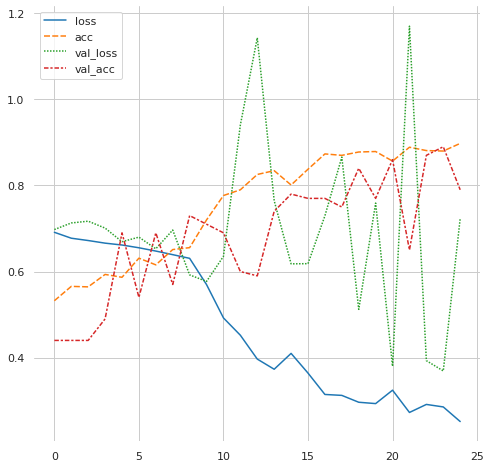

In [601]:
hist = M.fit(D[:900, :20], Star_Train[:900], 
             validation_data=(D[900:], Star_Valid[900:]), 
             epochs=25, verbose=0)
sns.set(style='whitegrid', rc={'figure.figsize': (8, 8)})
sns.lineplot(data=hist.history, palette='tab10')
sns.despine(left=True, bottom=True)

In [602]:
x = inp = K.Input((None, ))
x = L.Embedding(4, 4, 'identity', trainable=False)(x)
x = L.LSTM(16, return_sequences=True)(x)
Encoder = K.Model(inputs=[inp], outputs=[x])

In [603]:
print([w.shape for w in M.get_weights()])
print([w.shape for w in Encoder.get_weights()])

[(4, 4), (4, 64), (16, 64), (64,), (16, 1), (1,)]
[(4, 4), (4, 64), (16, 64), (64,)]


In [604]:
Encoder.set_weights(M.get_weights()[:len(Encoder.get_weights())])

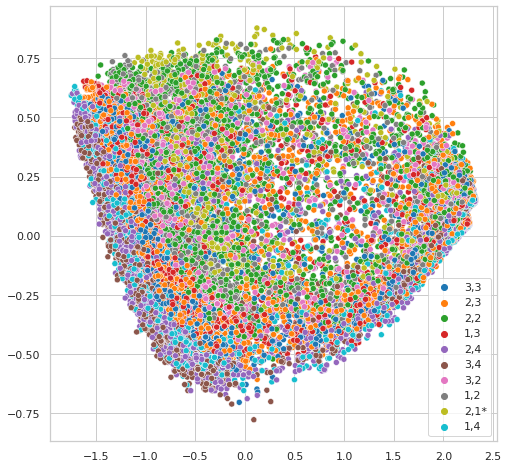

In [605]:
pca_plots(Encoder)

## Model four: step sizes of varying length

We will associate each step with the length of the step and feed this as input to the model as well.

In [694]:
def simulate_with_ss(Timesteps):
    x, y = start_x, start_y
    rows = []
    for t in range(Timesteps):
        ss = rng.uniform(0.5, 1.0)
        row = randstep(x, y, ss)
        x, y = row['x'], row['y']
        row['ss'] = ss
        row['t'] = t
        rows += [row]
    return pd.DataFrame(rows) 

simulate_with_ss(5)

,x,y,d,ss,t
0,2.000000,2.386639,U,0.613361,0
1,1.259981,2.386639,L,0.740019,1
2,2.211414,2.386639,R,0.951433,2
3,2.211414,2.966805,D,0.580166,3
4,3.053504,2.966805,R,0.842089,4


In [695]:
dfs = []
N = 1000
T = 30
for i in range(N):
    df1 = simulate_with_ss(T)
    df1['sim'] = i
    dfs += [df1]
ssdf = pd.concat(dfs, axis='index').reset_index(drop=True)
ssdf.head()

,x,y,d,ss,t,sim
0,1.445611,3.000000,L,0.554389,0,0
1,1.445611,3.737483,D,0.737483,1,0
2,1.445611,3.106229,U,0.631254,2,0
3,1.445611,2.395338,U,0.710891,3,0
4,1.445611,3.250812,D,0.855474,4,0


In [696]:
ssdf.describe()

,x,y,ss,t,sim
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2.419155,3.305369,0.748448,14.500000,499.500000
std,0.672273,0.779399,0.144276,8.655586,288.679802
min,1.000346,1.012417,0.500001,0.000000,0.000000
25%,1.934901,2.740098,0.623091,7.000000,249.750000
50%,2.418166,3.314457,0.748925,14.500000,499.500000
75%,2.909598,3.900308,0.871977,22.000000,749.250000
max,3.976350,4.978762,0.999991,29.000000,999.000000


The neural network only accept numeric inputs. Translate DULR chars to int keys:

In [697]:
ssdf['d_tr'] = ssdf.d.map(tr)
pdf = ssdf.pivot('sim', 't')
ssD = pdf.d_tr.to_numpy()
ssX = zmuv(pdf.x.to_numpy())
ssY = zmuv(pdf.y.to_numpy())
SS = zmuv(pdf.ss.to_numpy())[:, :, np.newaxis]
print('D', ssD.shape, np.unique(ssD))
print('X', ssX.shape)
print('Y', ssY.shape)
print('SS', SS.shape)

D (1000, 30) [0 1 2 3]
X (1000, 30)
Y (1000, 30)
SS (1000, 30, 1)


In [698]:
[
    ','.join([
        alts_at(x, y).rjust(4)
        for x in np.linspace(0, 5, num=10)
    ])    
    for y in np.linspace(0, 6, num=12)   
]

['    ,    ,    ,    ,   D,   D,    ,    ,    ,    ',
 '    ,    ,    ,    ,   D,   D,    ,    ,    ,    ',
 '    ,    ,  DR,  DR,   D,   D,  DL,  DL,    ,    ',
 '    ,    ,  DR,  DR,   D,   D,  DL,  DL,    ,    ',
 '   R,   R,  DR,  DR,DULR,DULR,  DL,  DL,   L,    ',
 '   R,   R,  DR,  DR,DULR,DULR,  DL,  DL,   L,    ',
 '   R,   R, DUR, DUR,DULR,DULR, DUL, DUL,   L,    ',
 '   R,   R, DUR, DUR,DULR,DULR, DUL, DUL,   L,    ',
 '   R,   R,  UR,  UR, ULR, ULR,  UL,  UL,   L,    ',
 '   R,   R,  UR,  UR, ULR, ULR,  UL,  UL,   L,    ',
 '    ,    ,   U,   U,   U,   U,   U,   U,    ,    ',
 '    ,    ,    ,    ,    ,    ,    ,    ,    ,    ']

In [699]:
x = inp = K.Input((None, ))
inp_ss = K.Input((None, 1))
x = L.Embedding(4, 4, 'identity', trainable=False)(x)
x = L.concatenate([x, inp_ss])
x = enc = L.LSTM(16, return_sequences=True)(x)
px = L.Dense(1, name='x')(x)
py = L.Dense(1, name='y')(x)
M = K.Model(inputs=[inp, inp_ss], outputs=[px, py])
M.summary()
M.compile('adam', ['mse', 'mse'])

Model: "model_95"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_72 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_78 (Embedding)        (None, None, 4)      16          input_72[0][0]                   
__________________________________________________________________________________________________
input_73 (InputLayer)           [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
concatenate_7 (Concatenate)     (None, None, 5)      0           embedding_78[0][0]               
                                                                 input_73[0][0]            

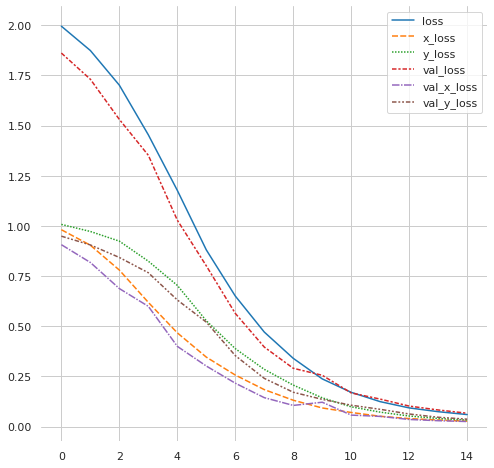

In [700]:
hist = M.fit((ssD[:900, :20], SS[:900, :20]), (ssX[:900, :20], ssY[:900, :20]), 
             validation_data=((ssD[900:], SS[900:]), (ssX[900:], ssY[900:])), 
             epochs=15, verbose=0)
sns.set(style='whitegrid', rc={'figure.figsize': (8, 8)})
sns.lineplot(data=hist.history, palette='tab10')
sns.despine(left=True, bottom=True)

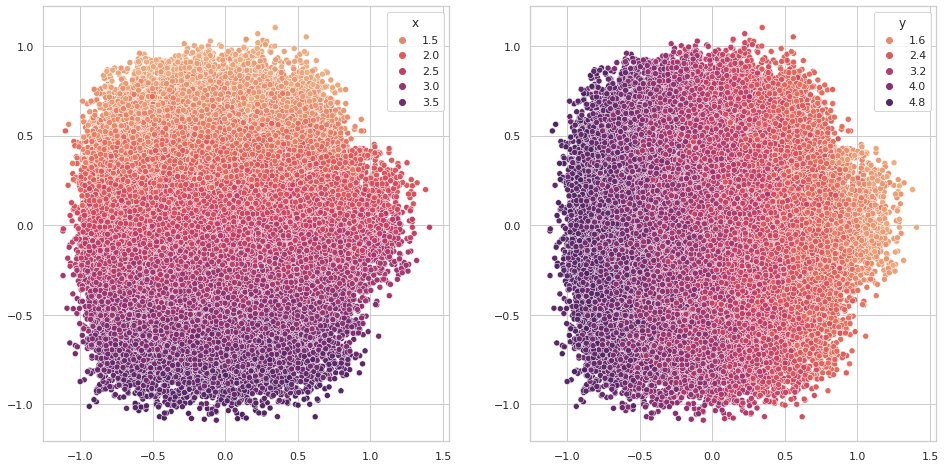

In [701]:
def pca_ss_plots(Encoder):
    encoded = Encoder((ssD, SS)).numpy()
    encoded = encoded.reshape(-1, encoded.shape[-1])
    pca = PCA(2).fit_transform(encoded)
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    sns.set(style='whitegrid')
    sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=ssdf.x, palette='flare', ax=axs[0])
    sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=ssdf.y, palette='flare', ax=axs[1])

pca_ss_plots(K.Model(inputs=[inp, inp_ss], outputs=[enc]))

## Model five: variable step size, classification

In [734]:
star_Train = (ssdf.pivot('sim', 't').y < 2).to_numpy()[:, :20].any(axis=-1)
star_Valid = (ssdf.pivot('sim', 't').y < 2).to_numpy().any(axis=-1)
print(pd.Series(star_Train).describe())
print(pd.Series(star_Valid).describe())

count      1000
unique        2
top       False
freq        598
dtype: object
count     1000
unique       2
top       True
freq       510
dtype: object


In [735]:
x = inp = K.Input((None, ))
inp_r = K.Input((None, 1))
x = L.Embedding(4, 4, 'identity', trainable=False)(x)
x = L.concatenate([x, inp_r])
x = L.LSTM(128, return_sequences=False)(x)
x = L.Dense(1, 'sigmoid', name='star')(x)
M = K.Model(inputs=[inp, inp_r], outputs=[x])
M.summary()
M.compile('adam', ['bce'], ['acc'])

Model: "model_97"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_74 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_79 (Embedding)        (None, None, 4)      16          input_74[0][0]                   
__________________________________________________________________________________________________
input_75 (InputLayer)           [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
concatenate_8 (Concatenate)     (None, None, 5)      0           embedding_79[0][0]               
                                                                 input_75[0][0]            

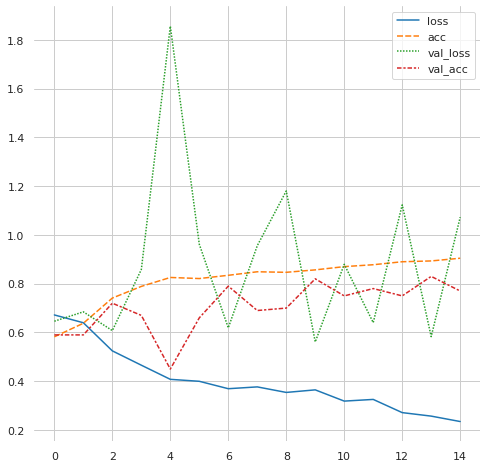

In [737]:
hist = M.fit((ssD[:900, :20], SS[:900, :20]), star_Train[:900], 
             validation_data=((ssD[900:], SS[900:]), star_Valid[900:]), 
             epochs=15, verbose=0)
sns.set(style='whitegrid', rc={'figure.figsize': (8, 8)})
sns.lineplot(data=hist.history, palette='tab10')
sns.despine(left=True, bottom=True)

In [ ]:
hist = M.fit((D, R.reshape(N, T, 1)), Distant, epochs=15, validation_split=0.1, batch_size=32, verbose=1)
sns.lineplot(data=hist.history)

In [748]:
x = inp = K.Input((None, ))
inp_r = K.Input((None, 1))
x = L.Embedding(4, 4, 'identity', trainable=False)(x)
x = L.concatenate([x, inp_r])
x = enc = L.LSTM(128, return_sequences=True)(x)
Encoder = K.Model(inputs=[inp, inp_r], outputs=[enc])

In [749]:
print([w.shape for w in M.get_weights()])
print([w.shape for w in Encoder.get_weights()])

[(4, 4), (5, 512), (128, 512), (512,), (128, 1), (1,)]
[(4, 4), (5, 512), (128, 512), (512,)]


In [750]:
Encoder.set_weights(M.get_weights()[:len(Encoder.get_weights())])

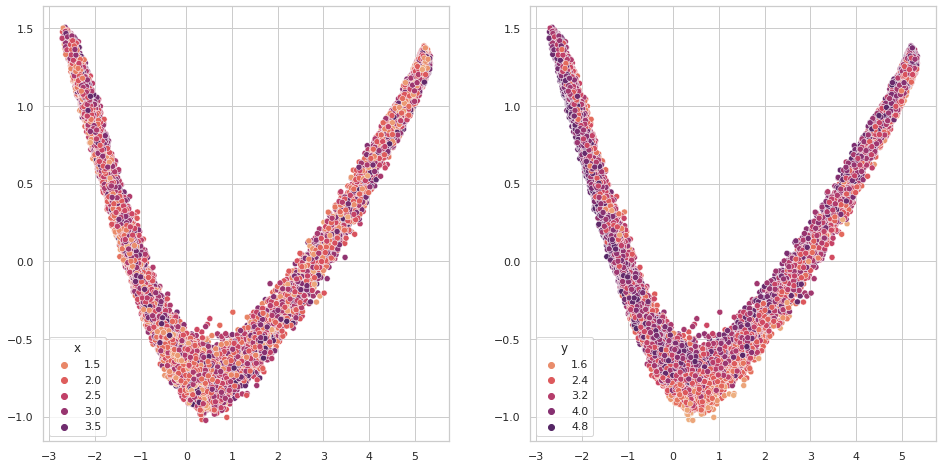

In [751]:
pca_ss_plots(Encoder)

## Embeddings

* One-hot encode for few categorical inputs
* With words as token lexicon gets big (in NLP 20k, 200k, 2M words): use dimensionality reduction (to 300 and 768 are common)
* Unsupervised a'la word2vec aka SGNS (Skip-gram Negative Sampling), Mikolov et al (2013)

## Stacking LSTMs

```python
x = LSTM(128, return_sequences=True)(x)
x = LSTM(128, return_sequences=True)(x)
x = LSTM(128, return_sequences=True)(x)
```

## Bidirectional LSTMs

```python
BiLSTM(xs) = [LSTM(xs), reversed(LSTM(reversed(xs)))]  # rougly!!
             # vector concatenation
```

```python
x = Bidirectional(LSTM(128, return_sequences=True))(x)
# x.shape = [Batch, Timesteps, 128 * 2]
```

* Encoded representation contains information both from the past and the future.
* Adding another layer theoretically allows information from the whole sequence to be used everywhere.
* Handles masking for sequences of different lengths correctly!

## Beyond LSTMs

* Gated Recurrent Unit, GRU, introduced in Cho et al 2014. 75% parameters of the LSTM. Strictly less expressive: LSTMs can count without bound and GRUs cannot.
  
  Footnote in Cho's thesis, 2015, 4.3.2: 
  > Okay, let me confess here. I was not well aware of long short-term memory when I was designing the gated recurrent unit together with Yoshua Bengio and Caglar Gulcehre in 2014.
  
* Bahdanau, Cho & Benigo (2015): RNNs + attention for neural machine translation
* Vaswani et al (2017): _Attention is All You Need_ introducing transformers
* Devlin et al (2018): _BERT: Bidirectional Encoder Representations using Transformers_ language model

## Summary

You have seen how to model:

* many-to-one 
* many-to-many
* categorical input and output
* continuous input and output
* multiple inputs and outputs
* how to examine encoded representation

Exercises: continue to explore this

# Exercises
    
1. Change the world layout and see how the networks behave.
2. Change the architectures and check how convergence and overfitting changes.
    1. Try to use another number of neurons in the LSTM. How small can it get?
    2. Try stacking two LSTMs after each other.
    3. Does it help to make the LSTM bidirectional?
3. Overfitting: now we train on 20 timesteps and validate on 30 timesteps. Can dramatically lowering the number of training timesteps make it to overfit? What does the PCA look like in this case?
4. How well do models 4 and 5 work if you don't feed the step lengths?
5. Keras provides two other RNN, SimpleRNN and the GRU. What's their performance on these tasks?
6. We can also use 1-dimensional CNN for sequence modelling, Conv1D in Keras. Can it solve any of the tasks here?
6. Embeddings: why can we use one-hot encoded if we're immediately going to use an LSTM after embedding?
7. The PCA of the encoded states sometimes contains noise. But we expect it to contain the x and y coordinate. We can check if they are in the encoded states with a "diagnostic classifier". Make one like this: freeze the encoder weights (set trainable to False) and linearly try to predict the x and y coordinate. If this is possible the encoded states have that information readily available. Diagnose the encoders with noisy PCA!   